In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#loading the data and reading the data
data = pd.read_csv(r"C:\Users\MADHAVAN\Downloads\Netflix Userbase.csv")
print(data)

      User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

             Country  Age  Gender      

In [3]:
#cleaning of data
#removing the rows containing none value
data.dropna()
#removing the column containing none value
data.dropna(axis=1)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [4]:
#converting the Join date into dat_time format
data["Join Date"]=pd.to_datetime(data["Join Date"],format="%d-%m-%y")
#converting the Last Payment Date into dat_time format
data["Last Payment Date"]=pd.to_datetime(data["Last Payment Date"],format="%d-%m-%y")
print(data.dtypes["Join Date"])
print(data.dtypes["Last Payment Date"])

datetime64[ns]
datetime64[ns]


In [5]:
#cleaning up inconsistent text entries if any
print(data["Subscription Type"].unique())
print(data["Country"].unique())
print(data["Device"].unique())


['Basic' 'Premium' 'Standard']
['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']
['Smartphone' 'Tablet' 'Smart TV' 'Laptop']


In [6]:
# convert to camel case
data['Country'] = data['Country'].str.title()
data['Subscription Type'] = data['Subscription Type'].str.title()
data['Device'] = data['Device'].str.title()
# remove trailing white spaces
data['Country'] = data['Country'].str.strip()
data['Country'] = data['Country'].str.strip()
data['Device'] = data['Device'].str.strip()


In [7]:
print(data)

      User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0           1             Basic               10 2022-01-15        2023-06-10   
1           2           Premium               15 2021-09-05        2023-06-22   
2           3          Standard               12 2023-02-28        2023-06-27   
3           4          Standard               12 2022-07-10        2023-06-26   
4           5             Basic               10 2023-05-01        2023-06-28   
...       ...               ...              ...        ...               ...   
2495     2496           Premium               14 2022-07-25        2023-07-12   
2496     2497             Basic               15 2022-08-04        2023-07-14   
2497     2498          Standard               12 2022-08-09        2023-07-15   
2498     2499          Standard               13 2022-08-12        2023-07-12   
2499     2500             Basic               15 2022-08-13        2023-07-12   

             Country  Age  

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Age'),
 Text(0.5, 1.0, 'Country vs Age')]

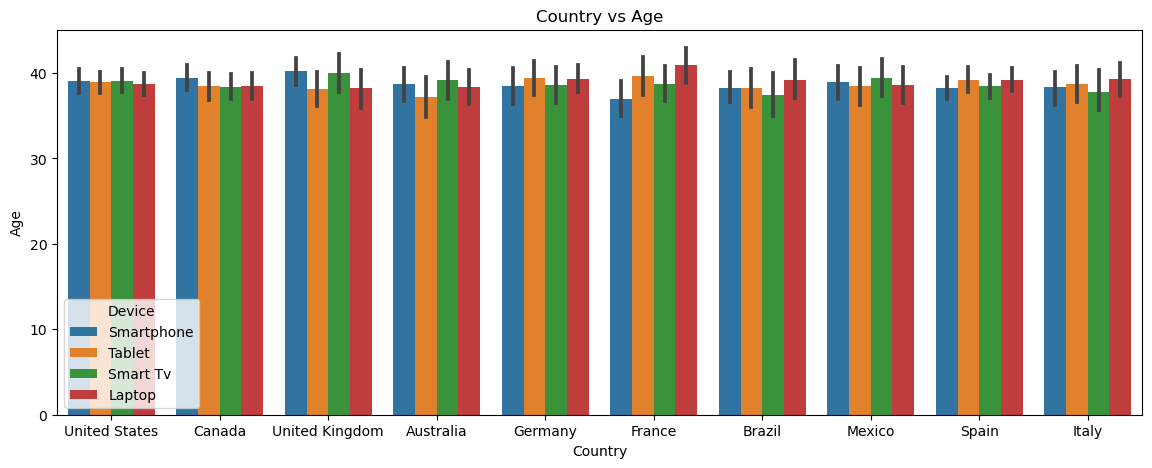

In [9]:
#ploting bar graph
#ploting usage of device vs age of people 
df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(14, 5))
l=sns.barplot(data=df,x=df["Country"],y=df["Age"],hue="Device",ax=ax)
l.set(xlabel="Country",ylabel="Age",title="Country vs Age")


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Revenue'),
 Text(0.5, 1.0, 'Month vs Monthly Revenue')]

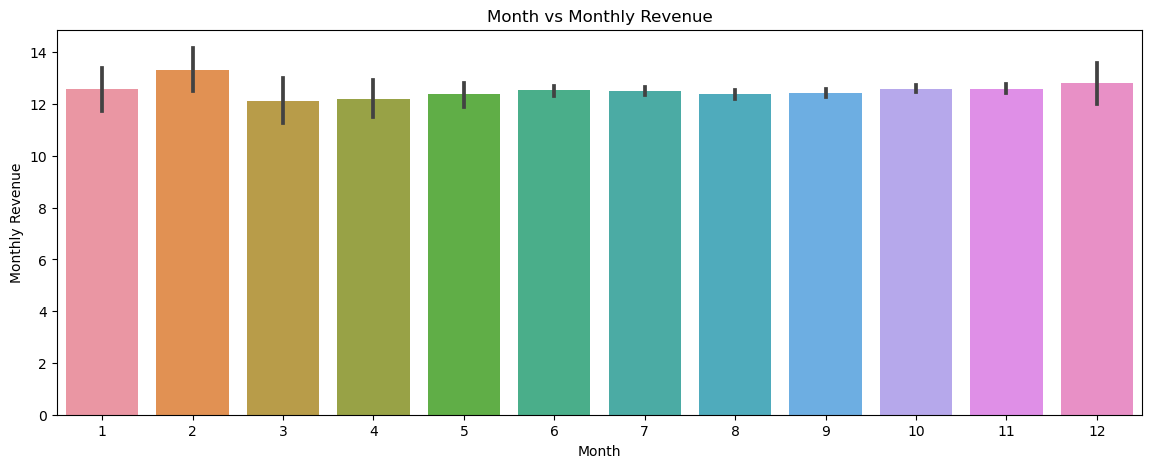

In [10]:
#ploting bar graph
#ploting month vs monthly revenue
df["Month"]=df["Join Date"].dt.month
fig, ax = plt.subplots(figsize=(14, 5))
l=sns.barplot(data=df,x=df["Month"],y=df["Monthly Revenue"],ax=ax)
l.set(xlabel="Month",ylabel="Monthly Revenue",title="Month vs Monthly Revenue")


datetime64[ns]
datetime64[ns]


[Text(0.5, 0, 'Monthly Revenue'),
 Text(0, 0.5, 'Age'),
 Text(0.5, 1.0, 'Month vs Monthly Revenue')]

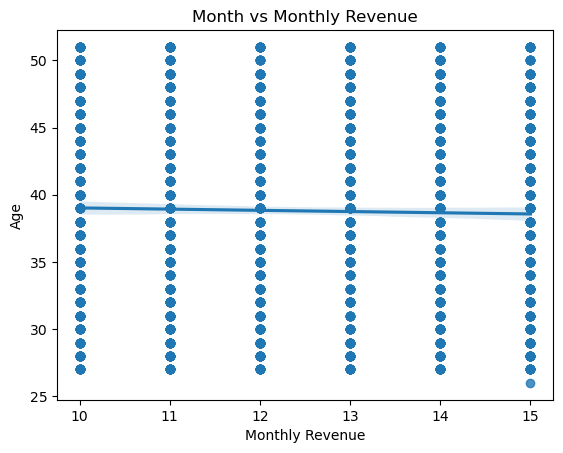

In [18]:
#scatter plot
#finding the regression between Join Date and Lat Payment Date
print(data.dtypes["Join Date"])
print(data.dtypes["Last Payment Date"])
l=sns.regplot(data=df,x=df["Monthly Revenue"],y=df["Age"])
l.set(xlabel="Monthly Revenue",ylabel="Age",title="Month vs Monthly Revenue")


[Text(0.5, 1.0, "Distribution of netflix user's age")]

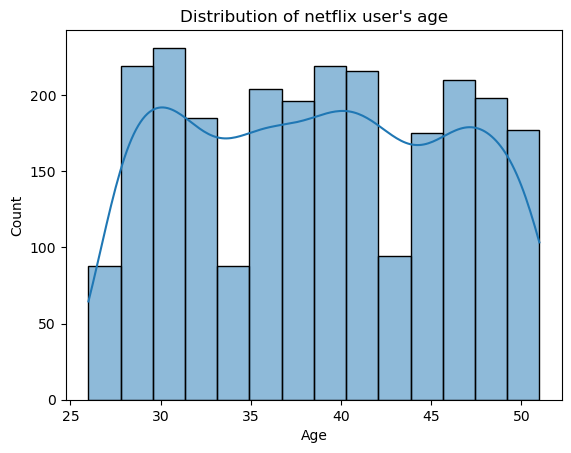

In [19]:
#histplot
#ploting the frequency distribution of people using the netflix
l=sns.histplot(data=df,x=df["Age"],kde=True)
l.set(title="Distribution of netflix user's age")


<Axes: xlabel='Age', ylabel='Density'>

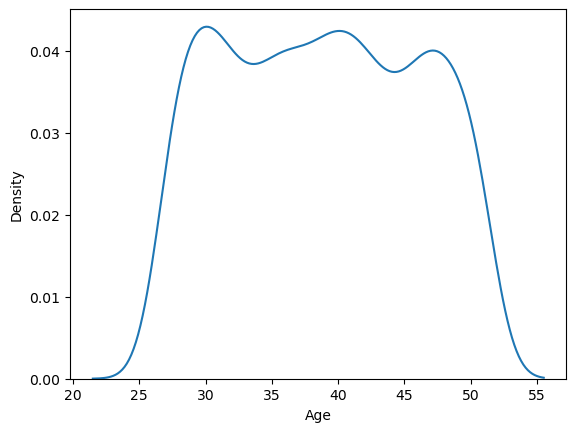

In [12]:
#kdeplot - visualizing the distribution of Age similar to histogram
l=sns.kdeplot(data=df,x=df["Age"])
l.set(title="Distribution of netflix user's age")



[Text(0.5, 1.0, 'Distribution of Monthly revenue of netflix')]

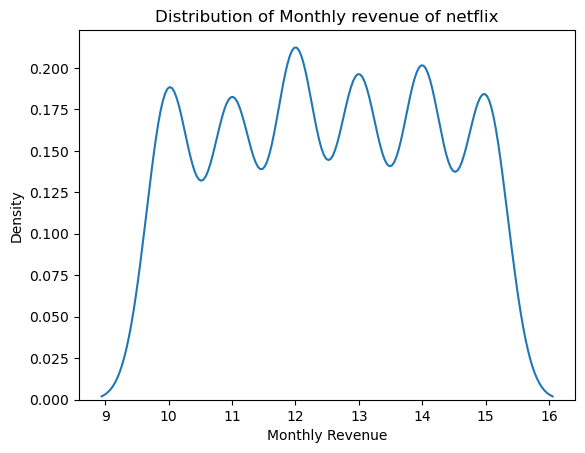

In [22]:
#kdeplot - visualizing the distribution of Monthly Revenue similar to histogram
l=sns.kdeplot(data=df,x=df["Monthly Revenue"])
l.set(title="Distribution of Monthly revenue of netflix")

Text(0.5, 0.98, "Distribution of netflix user's age and age of people using netflix")

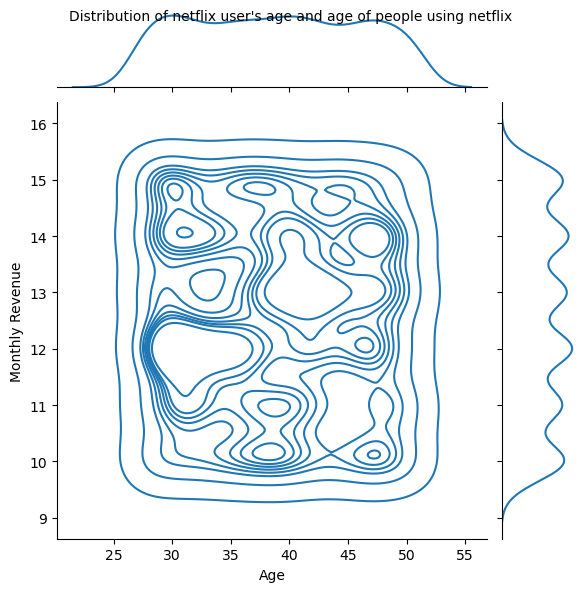

In [31]:
#jointplot-draw a plot of two variables with bivariate and univariate graphs
l=sns.jointplot(data=df,x=df["Age"],y=df["Monthly Revenue"],kind="kde")
l.fig.suptitle("Distribution of netflix user's age and age of people using netflix",size=10)


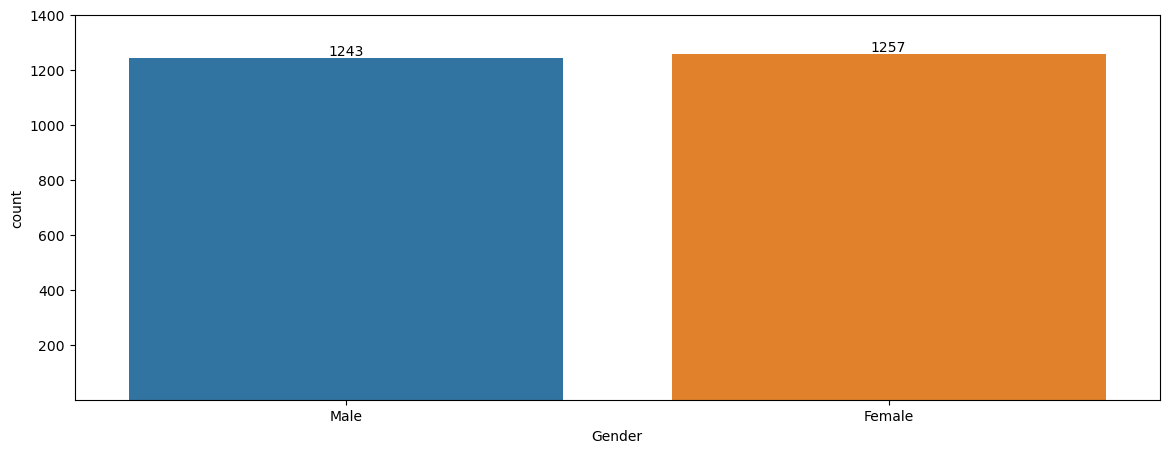

In [17]:
#countplot-plotting the number of male and female watching the netflix
fig, ax = plt.subplots(figsize=(14, 5))
sns.countplot(x=data["Gender"],data=df)
ax.set_ylim(1, 1400)
for i in ax.containers:
    ax.bar_label(i)


In [21]:
#removing the coliumns and rows containing NaN values
unnamed_cols  =  data.columns.str.contains('Unnamed')
data = data.iloc[:,~ unnamed_cols]

                  User ID  Monthly Revenue       Age     Month
User ID          1.000000        -0.004809  0.008065  0.252046
Monthly Revenue -0.004809         1.000000 -0.021143  0.022950
Age              0.008065        -0.021143  1.000000  0.006394
Month            0.252046         0.022950  0.006394  1.000000


C:\Users\MADHAVAN\AppData\Local\Temp\ipykernel_21276\2301038159.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=data.corr()


<Axes: >

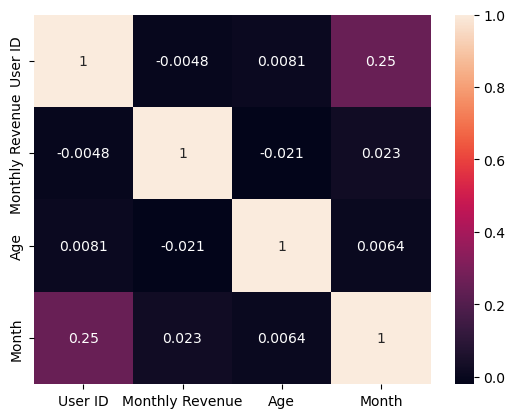

In [22]:
#finding the correlation betwwen the numberical values
x=data.corr()
print(x)
#plotting the heatmap to show the correlation between variables
sns.heatmap(x,annot=True)

<Axes: xlabel='Age', ylabel='Monthly Revenue'>

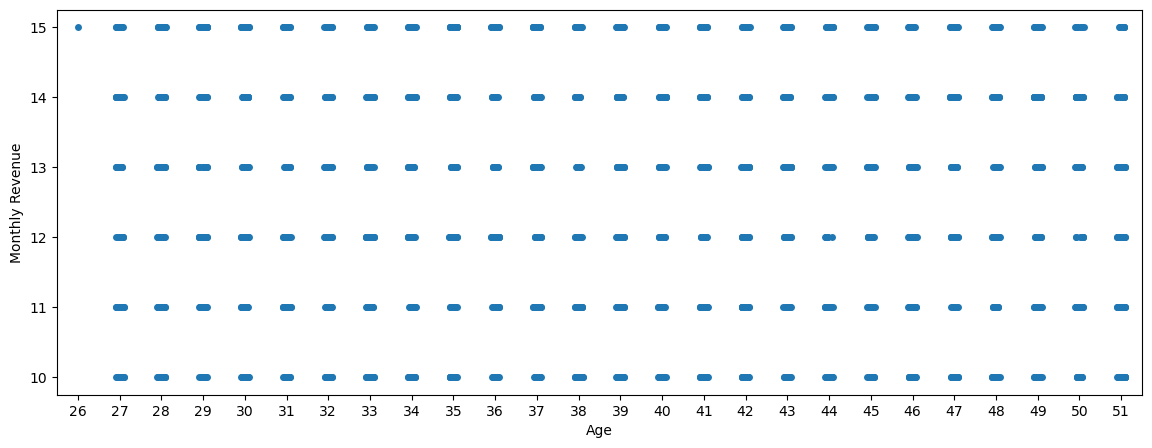

In [25]:
#draw a scatter plot where one of variables passed as argument is a categorical variable.
fig, ax = plt.subplots(figsize=(14, 5))

sns.stripplot(data=df,x=df["Age"],y=df["Monthly Revenue"])